# Sampling Distributions and the Central Limit Theorem

A key connection between probability and statistics is the concept of <span style="color:green; font-weight:bold">sampling distributions</span>.

## Sampling Distributions

```{sidebar}
Before we dig into sampling distributions and statistical theory, we need to understand sampling. We have several pre-packaged commands in R that allow is to quickly generate sample data from a specific distribution. We can also sample rows from a dataframe. The pages in this section will demonstrate how to use these functions together with specific examples.
```

**Definition.** For a fixed population and fixed sample size $k\in \mathbb{N}$, a collection of values of the mean over $n$ samples of size $k$ forms what we call a <span style="color:green; font-weight:bold">sampling distribution</span>.

Suppose that we have a sampling distribution:

$$X =\left\{X_1, X_2, \cdots, X_n\right\}$$

where $\bar x_i$ is the mean of the sample $X_i$.

For a sampling distribution, we know that:
- The sample size is $k$ for all $X_i$.
- The number of samples in our sampling distribution is $n$.

We refer to the <span style="color:blue; font-weight:bold">grand mean</span> $\bar x$ as the mean of the $n$ sample means, e.g.

$$\bar x = \sum_{i=1}^n\frac{\bar x_i}{n}$$

## Two Vital Theorems

The <span style="color:blue; font-weight:bold">Centrol Limit Theorem</span> (CLT) and <span style="color:blue; font-weight:bold">Law of Large Numbers</span> govern how sampling distributions work:

1. **Central Limit Theorem.** The means $\bar x_i$ of a sampling distribution are approximately normal (bell-shaped) and centered upon $\mu_0$, the population average. Additionally, as sample size $k$ increases, $\bar x \rightarrow \mu_0$.
2. **Law of Large Numbers.** As the number of samples $n$ in our sampling distribution increases, our estimates of the population mean $\mu_0$ increase in accuracy.

Thus, the CLT guarantees a bell-shaped distribution centered upon the population average, and the Law of Large Numbers works like a lever that allows us to control the accuracy. Increased sample size $k$ leads to increased accuracy by the CLT, and increased number of samples $n$ leads to increased accuracy by the Law of Large Numbers.

The Law of Large Numbers is vital due to the fact that the sample size is often limited. For example, sample size should be kept to less than $10\%$ of the population size. The population of all SAT scores for Forsyth County, GA, in 2025 may contain a few thousand items, while the population of SAT scores for the United States will contain millions of items. When the size of the population the sampling distribution is drawn from is limited, the Law of Large Numbers allows us to take many more samples to improve accuracy.

## Law of Large Numbers

If $\bar x$ is the grand mean of $n$ many sample averages $\bar x_i$ which are all have the same sample size $k$ and are drawn from the same population (or distribution) with mean $\mu$, then

$$n \rightarrow \infty \implies \bar{x} \rightarrow \mu$$

## Central Limit Theorem

Assume $\bar x$ is the grand mean of $n$ many sample averages $\bar x_i$ which all have the sample size $k$ and are drawn from the same population (or distribution) with mean $\mu$ and population standard deviation $\sigma$. For large values of $k$, this sampling distribution can be assumed approximately normal. Specifically, the sampling distribution can be assumed to be

$$N\left(\mu, \frac{\sigma}{\sqrt{k}} \right)$$

## Getting Started

To prepare for the examples and demonstrations, we two things. First, we need data to work with. Second, we need our main sampling function: **sample.data.frame**.

**Run the cell below to load 4 data sets.**

In [1]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
p <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

We will use three functions to perform the sampling:

1. **rflip** -- simulates a coin flip or binomial distribution.
2. **rspin** -- simulates a spinner which allows for a couple different distributions.
3. **sample.data.frame** -- draw a random sample of rows from a given data frame.

The code for these functions has been adapted from the documentation of the classic *mosaic* package which is still available in R given that you have the correct versioning for R and all mosaic's required dependencies.

**Run the cell below to activate the function:**

<font color="green"><center><b>rflip</b></center></font>

In [2]:
rflip <- function(n=1, prob=.5, quiet=FALSE, verbose = !quiet, summarize = FALSE, 
                  summarise = summarize) {
	if ( ( prob > 1 && is.integer(prob) ) ) {  
		# swap n and prob
		temp <- prob
		prob <- n
		n <- temp
	}
	if (summarise) {
	  heads <- rbinom(1, n, prob)
	  return(data.frame(n = n, heads = heads, tails = n - heads, prob = prob))
	} else {
	  r <- rbinom(n,1,prob)
	  result <- c('T','H')[ 1 + r ]
	  heads <- sum(r)
	  attr(heads,"n") <- n
	  attr(heads,"prob") <- prob 
	  attr(heads,"sequence") <- result
	  attr(heads,"verbose") <- verbose
	  class(heads) <- 'cointoss'
	  return(heads)
	}
}

Let's run an example.
```{hint}
Notice how the summarize = TRUE option organizes the output.
```

In [3]:
rflip(20, prob = 1/4)

[1] 4
attr(,"n")
[1] 20
attr(,"prob")
[1] 0.25
attr(,"sequence")
 [1] "T" "T" "T" "T" "H" "T" "T" "T" "T" "T" "T" "T" "H" "T" "H" "T" "T" "H" "T"
[20] "T"
attr(,"verbose")
[1] TRUE
attr(,"class")
[1] "cointoss"

In [4]:
rflip(20, prob = 1/4, summarize = TRUE)

n,heads,tails,prob
20,8,12,0.25


```{tip}
To extract the successes, (e.g. "heads"), we use our knowlege of how data frames work. Below, we use [row,column] notation to grab the value showing the number of successes.
```

In [5]:
rflip(20, prob = 1/4, summarize = TRUE)[1,2]

[1] 5

To draw repeated samples, we will need to learn to use a **for loop** in R. A simple example is shown below. Note that the curly brackets enclose the function(s) we wish to run repeatedly.

In [6]:
for (x in 1:7) {
  print(x)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7


## Example 1: M&M's

A collection vat in the manufacturing process at the M&M plant has millions of unsorted candies. There is 25\% chance of drawing a red candy. What is the expected number of red candies that will be drawn if we draw a sample of size 50?

The main <span style = 'color:blue;font-weight:bold'>for loop</span> is created below along with a display of middle 90\% of the results distribution indicated by blue vertical lines.

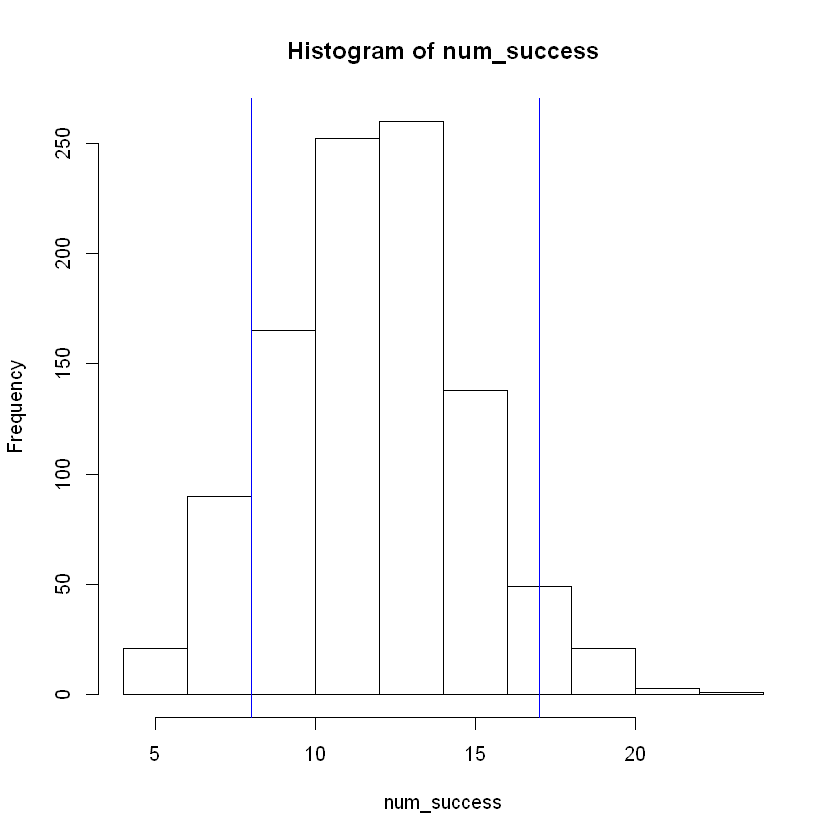

In [7]:
num_success <- c()     # create a vector to store the number of successes for each sample drawn
num_samps = 1000       # set the number of samples to be drawn

for (i in 1:num_samps){
    temp <- rflip(50, prob = 1/4, summarize = TRUE)[1,2]     # draw 50 candies, count numer of red
    num_success[i] <- temp     # count and store the number of red candies from this trial
}

lower <- quantile(num_success, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(num_success, prob = 0.95)     # Calcuate the 95th percentile.
hist(num_success, breaks = 8)
abline( v = lower, col="blue")     # Add vertical line at 5th percentile
abline(v = upper, col="blue")      # Add vertical line at 95th percentile           

## Example: Estimating Narcissism

Let's work with an example from the **personality** data set: narcissism. Let's generate many, many samples of the same size. We'll find the averages from each sample and use them to estimate the average level of narcissism for students at UNG.

### First Step: Generating Samples of Size $n=10$

Let's beging with the R commands necessary to sample the **Narc** column in the *personality* data frame. We will use the

<center><font color="red"><b>sample.data.frame()</b></font></center>

function to draw a sample.

**Run the cell below to see how this works, and notice:**

- The function inputs:
1. Name of the data frame to sample from.
2. Sample size to be drawn.
- The output: 10 rows from the data frame with all columns present.

In [8]:
s <- sample.data.frame(p, 10, orig.ids = FALSE)
head(s,15)

ERROR: Error in sample.data.frame(p, 10, orig.ids = FALSE): could not find function "sample.data.frame"


We can find the average narcissism for these 10 persons by subsetting our sample data frame **s**.

In [9]:
mean(s[ , 'Narc'])

ERROR: Error in mean(s[, "Narc"]): object 's' not found


**Putting it Together.** Eventually, we want to run a loop that does this a thousand or more times. Thus, we prefer a single line of code that will do it for us all at once. We wrap the *sample.data.frame()* function inside the *mean* function as shown below.

**Run the code below multiple times to see how we're sampling plus finding the average Narcissism level for each.**

In [10]:
mean(sample.data.frame(p, 10, orig.ids = F)[ , 'Narc'])

ERROR: Error in sample.data.frame(p, 10, orig.ids = F): could not find function "sample.data.frame"


### Step 2: Creating a for Loop

The steps make sense if we consider them separately:

1. Create **all_means**, an initially empty vector where we plan to store our sample means.
2. Create a for loop that will a thousand times.
3. Inside the loop, we will:
  - Gather a sample of size $n=10$.
  - Calcuate the mean.
  - Add this value to the **all_means** vector.

In [11]:
all_means <- c()                                         #Empty vector to store all the sample means
for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)     #Generate a sample (size n=10)
    all_means[count] <- mean(sample[ , 'Narc'])          #Save the mean of this sample in my list
}

ERROR: Error in sample.data.frame(p, 10, orig.ids = F): could not find function "sample.data.frame"


Notice that we now have a vector **all_means**, so we display the distribution in a histogram and caculate various statistics.

In [12]:
summary(all_means)
hist(all_means)

Length  Class   Mode 
     0   NULL   NULL 

ERROR: Error in hist.default(all_means): 'x' must be numeric


### Step 3: The Middle 90% of the Distribution

Because we intend to use the sampling distributions to estimate the population average, we need a way to gather an interval. This interval will be our estimated range of values. For the moment, let's use the **middle 90%** of the **all_means** vector. We will need the endpoints, e.g. the 5th and 95th percentiles from the vector.

In [13]:
lower <- quantile(all_means, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(all_means, prob = 0.95)     # Calcuate the 95th percentile.
cat('The middle 90% of the all_means vector is (',lower,',',upper,').')

The middle 90% of the all_means vector is ( NA , NA ).

### Step 4: The Histogram with Vertical Lines Showing the 5th and 95th Percentiles

We use the function **abline()** to superimpose vertical lines onto our histogram. We've already calculated the values for the 5th and 95th percentiles. We need only to use the option **v** which draws a *vertical line* at the value indicated. The color option is not vital for our purposes, but a splash of color is visually appealing.

As we go forward, we will see that increased sample size will lead to a narrower bell-shape. In other words, the size of the standard deviation will become important, so let's include that in the text we print out using the **cat()** function.

In [14]:
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

Standard deviation of sampling distribution: NA 
The middle 90% of the sampling distribution: is ( NA , NA ).

ERROR: Error in hist.default(all_means): 'x' must be numeric


### Step 5: Performing all Tasks in 1 Code Block

Now that we have unpacked each command line needed, we can put it all together into one code block. We have also added the parameters **reps** and **samp_size** as the top 2 lines to make it easy to set them to a single value. Doing these tasks will help to quickly generate different sampling distributions for different sample sizes **n**.

In [15]:
reps = 1000          # Number of repetitions of FOR loop
samp_size = 10       # Sample size to be drawn
all_means <- c()     # Empty vector to store all the sample means

for (count in 1:reps){
    sample <- sample.data.frame(p, 10, orig.ids = F)
    all_means[count] <- mean(sample[ , 'Narc'])
}

upper <- quantile(all_means, prob = 0.95)
lower <- quantile(all_means, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of sampling distribution: (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

ERROR: Error in sample.data.frame(p, 10, orig.ids = F): could not find function "sample.data.frame"
